# Eleições 2020
## Analise de dados dos candidatos a prefeito e vereador

Este é um trabalho de análise de dados das eleições municipais de 2020, feito por aluno(s) Fatec - São josé dos campos, curso de Análise e Desenvolvimento de Sistemas para a disciplina de Estrutura de Dados do Profº Fernando Masanori.
A fonte dos dados pode ser acessada em http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1
O conteúdo desde notebook serve apenas para aprendizado e não deve ser utilizado para fins de propaganda politico-partidaria de qualquer natureza. 

In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

O arquivo original tem 63 colunas, portanto usarei apenas aquelas que considerar relevantes

In [2]:
## importando os dados
file = r'consulta_cand_2020_SP.csv'
lst = ['DS_ELEICAO', 'SG_UF', 'NM_UE', 'DS_CARGO', 'DS_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND', 
       'SG_PARTIDO', 'SG_UF_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_COR_RACA', 'DS_OCUPACAO']
df = pd.read_csv(file, delimiter=';',usecols= lst, encoding='Latin 1')
df.shape

(93692, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93692 entries, 0 to 93691
Data columns (total 13 columns):
DS_ELEICAO                  93692 non-null object
SG_UF                       93692 non-null object
NM_UE                       93692 non-null object
DS_CARGO                    93692 non-null object
DS_SITUACAO_CANDIDATURA     93692 non-null object
DS_DETALHE_SITUACAO_CAND    93692 non-null object
SG_PARTIDO                  93692 non-null object
SG_UF_NASCIMENTO            93692 non-null object
NM_MUNICIPIO_NASCIMENTO     93692 non-null object
DS_GENERO                   93692 non-null object
DS_GRAU_INSTRUCAO           93692 non-null object
DS_COR_RACA                 93692 non-null object
DS_OCUPACAO                 93692 non-null object
dtypes: object(13)
memory usage: 9.3+ MB


## Pergunta - Quem são os candidatos?

Primeiramente irei utilizar o municipio de sjc como amostra, depois irei comparar com o resto do estado

## Municipio de São José dos Campos

In [4]:
df_sjc = df.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"')
df_sjc.shape

(621, 13)

In [5]:
df_sjc.describe()

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
count,621,621,621,621,621,621,621,621,621,621,621,621,621
unique,1,1,1,3,2,5,24,20,210,2,7,5,97
top,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,PT,SP,SÃO JOSÉ DOS CAMPOS,MASCULINO,SUPERIOR COMPLETO,BRANCA,OUTROS
freq,621,621,621,599,606,582,34,437,262,418,240,451,100


Os partidos com mais candidatos pt, psdb, psl e psd, na maioria os candidatos são homens, muitos tem curso superior completo e são brancos

In [6]:
df_sjc.sample(5)

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
61462,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,PSL,MG,CÓRREGO DO BOM JESUS,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,BRANCA,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA
84953,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,AVANTE,SP,GUARATINGUETÁ,FEMININO,SUPERIOR INCOMPLETO,BRANCA,ENFERMEIRO
8635,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,PSL,SP,SÃO JOSÉ DOS CAMPOS,MASCULINO,SUPERIOR COMPLETO,BRANCA,SERVIDOR PÚBLICO MUNICIPAL
64726,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,PSDB,MG,POUSO ALTO,MASCULINO,SUPERIOR COMPLETO,BRANCA,ENGENHEIRO
84292,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,VEREADOR,APTO,DEFERIDO,MDB,PR,FAXINAL,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,SERVIDOR PÚBLICO MUNICIPAL


In [7]:
df_sjc.query('DS_CARGO == "PREFEITO"')

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
593,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSL,SP,APARECIDA,MASCULINO,SUPERIOR COMPLETO,BRANCA,ADMINISTRADOR
22681,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PL,SP,SÃO PAULO,FEMININO,SUPERIOR COMPLETO,BRANCA,POLICIAL MILITAR
28479,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSB,SP,SÃO PAULO,MASCULINO,SUPERIOR COMPLETO,BRANCA,MÉDICO
32239,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PC do B,SP,CRUZEIRO,MASCULINO,SUPERIOR COMPLETO,PRETA,APOSENTADO (EXCETO SERVIDOR PÚBLICO)
33548,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PTC,SP,SERTÃOZINHO,MASCULINO,SUPERIOR COMPLETO,BRANCA,ADMINISTRADOR
45254,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSOL,SP,SÃO PAULO,FEMININO,ENSINO MÉDIO COMPLETO,BRANCA,ELETRICISTA E ASSEMELHADOS
52462,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,NOVO,RO,PORTO VELHO,MASCULINO,SUPERIOR COMPLETO,PARDA,PROFESSOR DE ENSINO SUPERIOR
61593,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSD,SP,TAUBATÉ,FEMININO,SUPERIOR COMPLETO,BRANCA,ADVOGADO
70808,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PSDB,SP,SÃO PAULO,MASCULINO,SUPERIOR COMPLETO,BRANCA,PREFEITO
85011,Eleições Municipais 2020,SP,SÃO JOSÉ DOS CAMPOS,PREFEITO,APTO,DEFERIDO,PT,SP,SÃO JOSÉ DOS CAMPOS,MASCULINO,SUPERIOR COMPLETO,BRANCA,VEREADOR


In [8]:
df_sjc['DS_CARGO'].value_counts()

VEREADOR         599
VICE-PREFEITO     11
PREFEITO          11
Name: DS_CARGO, dtype: int64

### Proporção de generos em geral

In [9]:
df_sjc['DS_GENERO'].value_counts()

MASCULINO    418
FEMININO     203
Name: DS_GENERO, dtype: int64

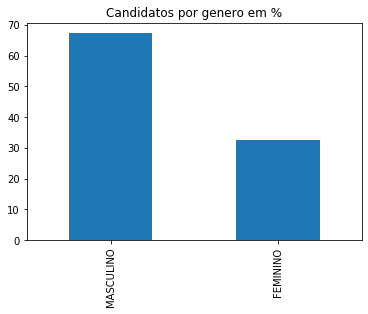

In [10]:
(df_sjc['DS_GENERO'].value_counts('DS_GENERO')*100).plot.bar(title='Candidatos por genero em %')

### Grau de escolaridade

In [11]:
df_sjc['DS_GRAU_INSTRUCAO'].value_counts()

SUPERIOR COMPLETO                240
ENSINO MÉDIO COMPLETO            227
ENSINO FUNDAMENTAL COMPLETO       48
SUPERIOR INCOMPLETO               45
ENSINO FUNDAMENTAL INCOMPLETO     31
ENSINO MÉDIO INCOMPLETO           20
LÊ E ESCREVE                      10
Name: DS_GRAU_INSTRUCAO, dtype: int64

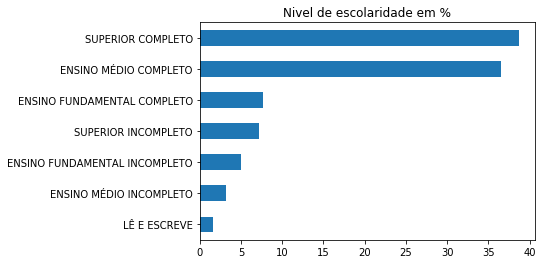

In [12]:
(df_sjc['DS_GRAU_INSTRUCAO'].value_counts('DS_GRAU_INSTRUCAO', 
                                          ascending=True) * 100).plot.barh(title='Nivel de escolaridade em %')

In [13]:
df_sjc['DS_SITUACAO_CANDIDATURA'].value_counts()

APTO      606
INAPTO     15
Name: DS_SITUACAO_CANDIDATURA, dtype: int64

In [14]:
df_sjc['DS_DETALHE_SITUACAO_CAND'].value_counts()

DEFERIDO                  582
INDEFERIDO COM RECURSO     22
INDEFERIDO                  9
RENÚNCIA                    6
DEFERIDO COM RECURSO        2
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

### Por cor

In [15]:
df_sjc['DS_COR_RACA'].value_counts()

BRANCA      451
PARDA        97
PRETA        67
AMARELA       5
INDÍGENA      1
Name: DS_COR_RACA, dtype: int64

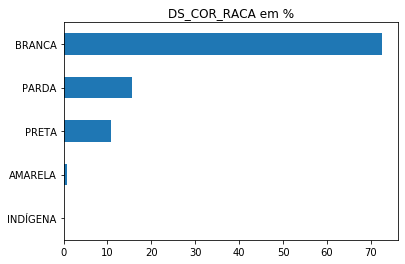

In [16]:
(df_sjc['DS_COR_RACA'].value_counts('DS_COR_RACA', 
                                          ascending=True) * 100).plot.barh(title='DS_COR_RACA em %')

## No estado de São Paulo

In [17]:
df.isnull().sum()

DS_ELEICAO                  0
SG_UF                       0
NM_UE                       0
DS_CARGO                    0
DS_SITUACAO_CANDIDATURA     0
DS_DETALHE_SITUACAO_CAND    0
SG_PARTIDO                  0
SG_UF_NASCIMENTO            0
NM_MUNICIPIO_NASCIMENTO     0
DS_GENERO                   0
DS_GRAU_INSTRUCAO           0
DS_COR_RACA                 0
DS_OCUPACAO                 0
dtype: int64

In [18]:
df.sample(5)

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
32806,Eleições Municipais 2020,SP,BOCAINA,VEREADOR,APTO,DEFERIDO,CIDADANIA,SP,JAÚ,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,BRANCA,SERVIDOR PÚBLICO MUNICIPAL
32430,Eleições Municipais 2020,SP,SÃO PEDRO DO TURVO,VEREADOR,APTO,DEFERIDO,REPUBLICANOS,SP,IBIRAREMA,FEMININO,ENSINO FUNDAMENTAL COMPLETO,BRANCA,DONA DE CASA
60598,Eleições Municipais 2020,SP,BOITUVA,VEREADOR,APTO,DEFERIDO,REPUBLICANOS,BA,ITABUNA,MASCULINO,ENSINO MÉDIO COMPLETO,PRETA,TÉCNICO DE QUÍMICA
57485,Eleições Municipais 2020,SP,PEDRANÓPOLIS,VEREADOR,APTO,DEFERIDO,SOLIDARIEDADE,SP,FERNANDÓPOLIS,FEMININO,ENSINO MÉDIO COMPLETO,BRANCA,"VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIA..."
59748,Eleições Municipais 2020,SP,PEDREIRA,VEREADOR,APTO,DEFERIDO,PATRIOTA,SP,PEDREIRA,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES"


In [19]:
df.describe()

,DS_ELEICAO,SG_UF,NM_UE,DS_CARGO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_OCUPACAO
count,93692,93692,93692,93692,93692,93692,93692,93692,93692,93692,93692,93692,93692
unique,1,1,645,3,3,11,33,28,3182,2,8,6,229
top,Eleições Municipais 2020,SP,SÃO PAULO,VEREADOR,APTO,DEFERIDO,PSDB,SP,SÃO PAULO,MASCULINO,ENSINO MÉDIO COMPLETO,BRANCA,OUTROS
freq,93692,93692,2030,88281,89547,83825,8649,75216,9186,62255,36949,65081,22161


O partido com mais candidados é o psdb, a maioria em ensino medio completo, são brancos e homens.

In [20]:
df['SG_PARTIDO'].value_counts()

PSDB             8649
DEM              6662
MDB              6467
PSD              5957
PTB              5678
REPUBLICANOS     5661
PL               5325
PODE             5220
PSL              4325
PP               3901
PSB              3576
PDT              3195
SOLIDARIEDADE    3185
PT               3185
CIDADANIA        3180
PATRIOTA         3134
PV               2912
AVANTE           2440
PSC              2058
PRTB             1977
PROS             1241
PTC              1023
PC do B           984
PSOL              949
REDE              790
PMN               635
DC                584
PMB               539
NOVO              129
PSTU               59
PCO                56
UP                 10
PCB                 6
Name: SG_PARTIDO, dtype: int64

In [21]:
df['DS_CARGO'].value_counts()

VEREADOR         88281
VICE-PREFEITO     2730
PREFEITO          2681
Name: DS_CARGO, dtype: int64

### Proporção de generos em geral

In [22]:
df['DS_GENERO'].value_counts()

MASCULINO    62255
FEMININO     31437
Name: DS_GENERO, dtype: int64

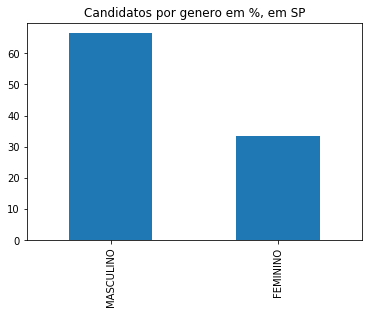

In [23]:
(df['DS_GENERO'].value_counts('DS_GENERO')*100).plot.bar(title='Candidatos por genero em %, em SP')

A proporção entre os generos é similar na amostra

### Grau de escolaridade

In [24]:
df['DS_GRAU_INSTRUCAO'].value_counts()

ENSINO MÉDIO COMPLETO            36949
SUPERIOR COMPLETO                26395
ENSINO FUNDAMENTAL COMPLETO      11099
ENSINO FUNDAMENTAL INCOMPLETO     8171
SUPERIOR INCOMPLETO               4622
ENSINO MÉDIO INCOMPLETO           4140
LÊ E ESCREVE                      2315
ANALFABETO                           1
Name: DS_GRAU_INSTRUCAO, dtype: int64

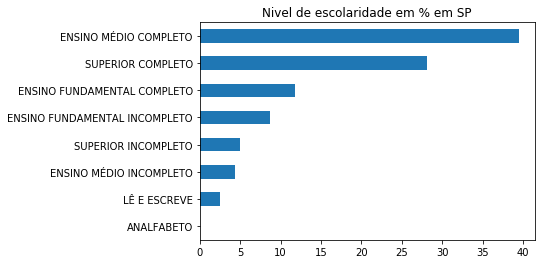

In [25]:
(df['DS_GRAU_INSTRUCAO'].value_counts('DS_GRAU_INSTRUCAO', 
                                          ascending=True) * 100).plot.barh(title='Nivel de escolaridade em % em SP')

Na amostra temos 40% dos candidatos com superior completo, seguido de ensino medio completo, para o estado a situação é inversa.

### Por cor

In [26]:
df['DS_COR_RACA'].value_counts()

BRANCA            65081
PARDA             18879
PRETA              8697
SEM INFORMAÇÃO      629
AMARELA             333
INDÍGENA             73
Name: DS_COR_RACA, dtype: int64

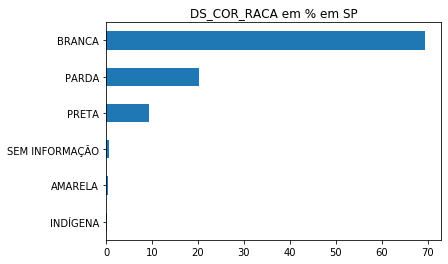

In [27]:
(df['DS_COR_RACA'].value_counts('DS_COR_RACA', 
                                          ascending=True) * 100).plot.barh(title='DS_COR_RACA em % em SP')

Em relação a etnia, ainda temos uma quantidade muito maior de brancos.